In [0]:
from pyspark.sql.types import *

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1588806621538_0005,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
cancellation_df = spark.read.format('csv').load('s3://flightanalysis/cleaned-dataset/flight-cancellation/cancellation.csv', header=True, inferSchema=True)
cancellation_df.na.drop().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------------+-----------------+------+------+
|date|flight_number|flight_identifier|cancel|reason|
+----+-------------+-----------------+------+------+
|2009|         7104|               YV|     1|     A|
|2009|         7329|               YV|     1|     A|
|2009|         7065|               YV|     1|     A|
|2009|         2984|               YV|     1|     B|
|2009|         2823|               YV|     1|     B|
|2009|         7344|               YV|     1|     A|
|2009|         2798|               YV|     1|     B|
|2009|         2939|               YV|     1|     B|
|2009|         4537|               OO|     1|     A|
|2009|         4537|               OO|     1|     A|
|2009|         4785|               OO|     1|     B|
|2009|         4794|               OO|     1|     B|
|2009|         4810|               OO|     1|     B|
|2009|         5424|               OO|     1|     A|
|2009|         5466|               OO|     1|     B|
|2009|         5510|               OO|     1| 

In [0]:
cancellation_df.filter(cancellation_df.reason =='A').show(2)
print("Cancellation due to Airline/Carrier ", cancellation_df.filter(cancellation_df.reason =='A').count())

cancellation_df.filter(cancellation_df.reason =='B').show(2)
print("Cancellation due to Weather ", cancellation_df.filter(cancellation_df.reason =='B').count())

cancellation_df.filter(cancellation_df.reason =='C').show(2)
print("Cancellation due to National Air System ", cancellation_df.filter(cancellation_df.reason =='C').count())

cancellation_df.filter(cancellation_df.reason =='D').show(2)
print("Cancellation due to Security ", cancellation_df.filter(cancellation_df.reason =='D').count())


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------------+-----------------+------+------+
|date|flight_number|flight_identifier|cancel|reason|
+----+-------------+-----------------+------+------+
|2009|         7104|               YV|     1|     A|
|2009|         7329|               YV|     1|     A|
+----+-------------+-----------------+------+------+
only showing top 2 rows

Cancellation due to Airline/Carrier  315450
+----+-------------+-----------------+------+------+
|date|flight_number|flight_identifier|cancel|reason|
+----+-------------+-----------------+------+------+
|2009|         2984|               YV|     1|     B|
|2009|         2823|               YV|     1|     B|
+----+-------------+-----------------+------+------+
only showing top 2 rows

Cancellation due to Weather  476446
+----+-------------+-----------------+------+------+
|date|flight_number|flight_identifier|cancel|reason|
+----+-------------+-----------------+------+------+
|2009|         2133|               9E|     1|     C|
|2009|          310|  

In [0]:
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)

In [0]:
import matplotlib.pyplot as plt

#total reason per year 

labels = ['airline_carrier', 'weather', 'national_air_system', 'security']
sizes = [315450, 476446, 189605, 708]

explode = (0, 0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='best')

plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

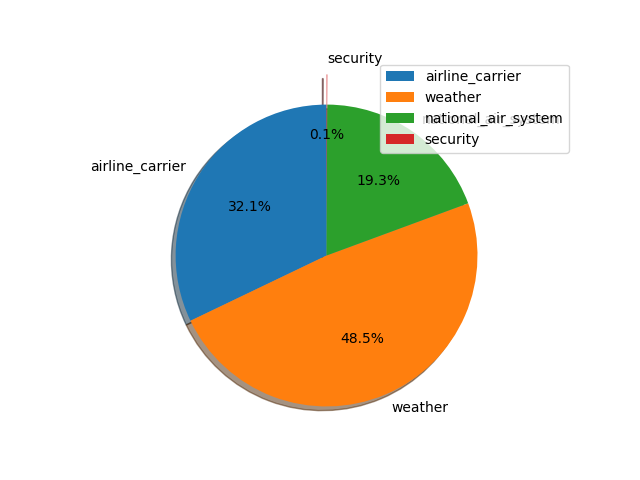

In [0]:
%matplot plt

In [0]:
sc.install_pypi_package("pandas==0.25.1") 
df = cancellation_df.select('flight_identifier').toPandas()
ax = df.plot.hist()#bins=12, alpha=0.5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
df.groupby('flight_identifier').count().plot(kind='bar')

In [0]:
%matplot plt